import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data with the help of Pandas

Creating seprate dataframes for client and price data

In [11]:
client_df = pd.read_csv("data/client_data.csv")
price_df = pd.read_csv("data/price_data.csv")

Now we will analyse data by printing its head and tails

In [24]:
client_df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [26]:
price_df.tail()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
192997,16f51cdc2baa19af0b940ee1b3dd17d5,2015-08-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192998,16f51cdc2baa19af0b940ee1b3dd17d5,2015-09-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
192999,16f51cdc2baa19af0b940ee1b3dd17d5,2015-10-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193000,16f51cdc2baa19af0b940ee1b3dd17d5,2015-11-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555
193001,16f51cdc2baa19af0b940ee1b3dd17d5,2015-12-01,0.119916,0.102232,0.076257,40.728885,24.43733,16.291555


Now we will print the **Descriptive Statistics**, it will help to understand the data contents, datatypes

In [27]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

Now we will convert **[date_activ, date_end, date_modif_prod, date_renewal ]** into the data time format

In [28]:
date=["date_activ", "date_end", "date_modif_prod", "date_renewal"]

for _ in date:
  client_df[_] = pd.to_datetime(client_df[_])

client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

Now will work on **Price data**

In [29]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


Convert the **[price date]** to date type

In [31]:
price_df["price_date"] = pd.to_datetime(price_df["price_date"])

# Printing again the info
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [41]:
# Now we will see the structure(row and col) in client data
client_df.shape

(14606, 26)

In [40]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,...,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606,14606,14606,14606,14606.000000,14606.000000,14606.000000,...,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,2011-01-28 07:54:18.879912448,2016-07-27 20:48:26.422018560,2013-01-02 12:29:10.951663872,2015-07-21 06:59:00.353279488,1868.614880,1399.762906,0.966726,...,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
min,0.000000e+00,0.000000e+00,0.000000,2003-05-09 00:00:00,2016-01-28 00:00:00,2003-05-09 00:00:00,2013-06-26 00:00:00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,2010-01-15 00:00:00,2016-04-27 06:00:00,2010-08-12 00:00:00,2015-04-17 00:00:00,494.995000,0.000000,0.000000,...,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,2011-03-04 00:00:00,2016-08-01 00:00:00,2013-06-19 00:00:00,2015-07-27 00:00:00,1112.875000,314.000000,0.000000,...,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2012-04-19 00:00:00,2016-10-31 00:00:00,2015-06-16 00:00:00,2015-10-29 00:00:00,2401.790000,1745.750000,0.000000,...,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,2014-09-01 00:00:00,2017-06-13 00:00:00,2016-01-29 00:00:00,2016-01-28 00:00:00,82902.830000,175375.000000,30.000000,...,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000
std,5.734653e+05,1.629731e+05,64364.196422,NaN,NaN,NaN,NaN,2387.571531,3247.786255,5.108289,...,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175


In [42]:
price_df.shape

(193002, 8)

In [43]:
price_df.describe()

,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,2015-06-16 12:50:49.933161216,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
min,2015-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015-04-01 00:00:00,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,2015-07-01 00:00:00,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,2015-10-01 00:00:00,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,2015-12-01 00:00:00,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221
std,NaN,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592


# Checking the data for Missing data

In [44]:
client_df.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [45]:
price_df.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

# Data Visualisation

In [46]:
churn=client_df[['id','churn']]
churn.columns=['Companies','churn']
churn_total=churn.groupby(churn['churn']).count()
churn_per=churn_total/churn_total.sum()*100
churn_per

,Companies
churn,
0,90.284814
1,9.715186


Text(0, 0.5, 'Company base(%')

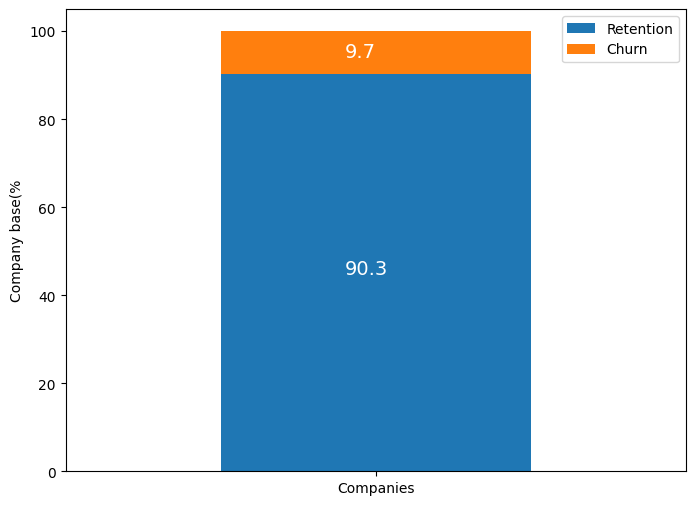

In [48]:
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    
    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

ax=churn_per.transpose().plot(kind='bar',stacked=True,figsize=(8,6),rot=0)
annotate_stacked_bars(ax, textsize=14)
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Company base(%')

**Consumption** of customer during the last month, 12 months against the churn

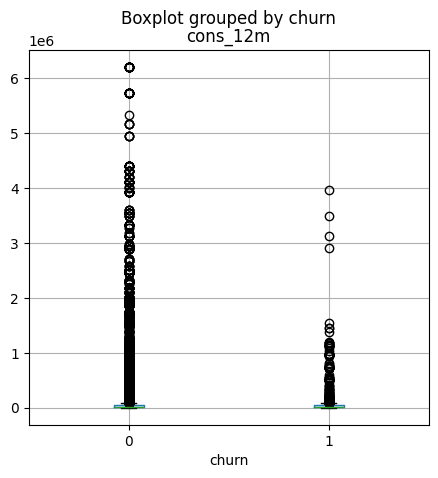

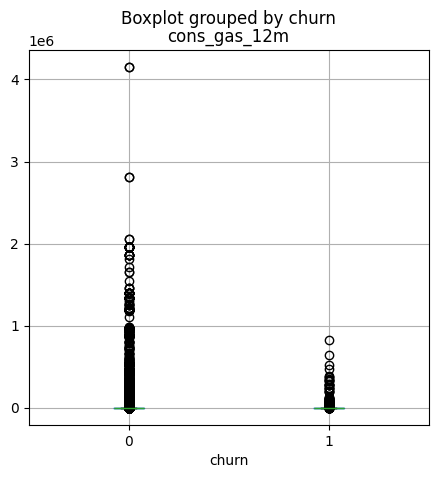

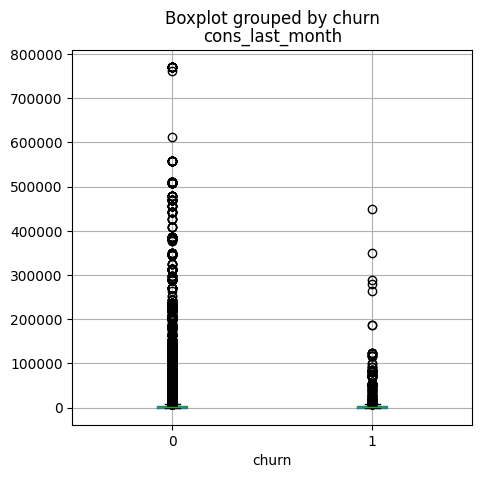

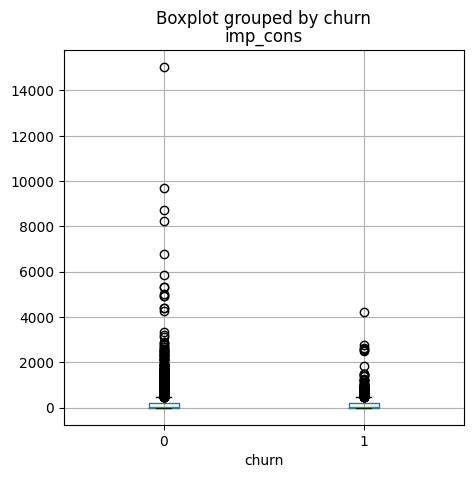

In [50]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]
for col in consumption:
  client_df.boxplot(column=col, by="churn", figsize=(5,5))
  plt.title(col)
plt.show()

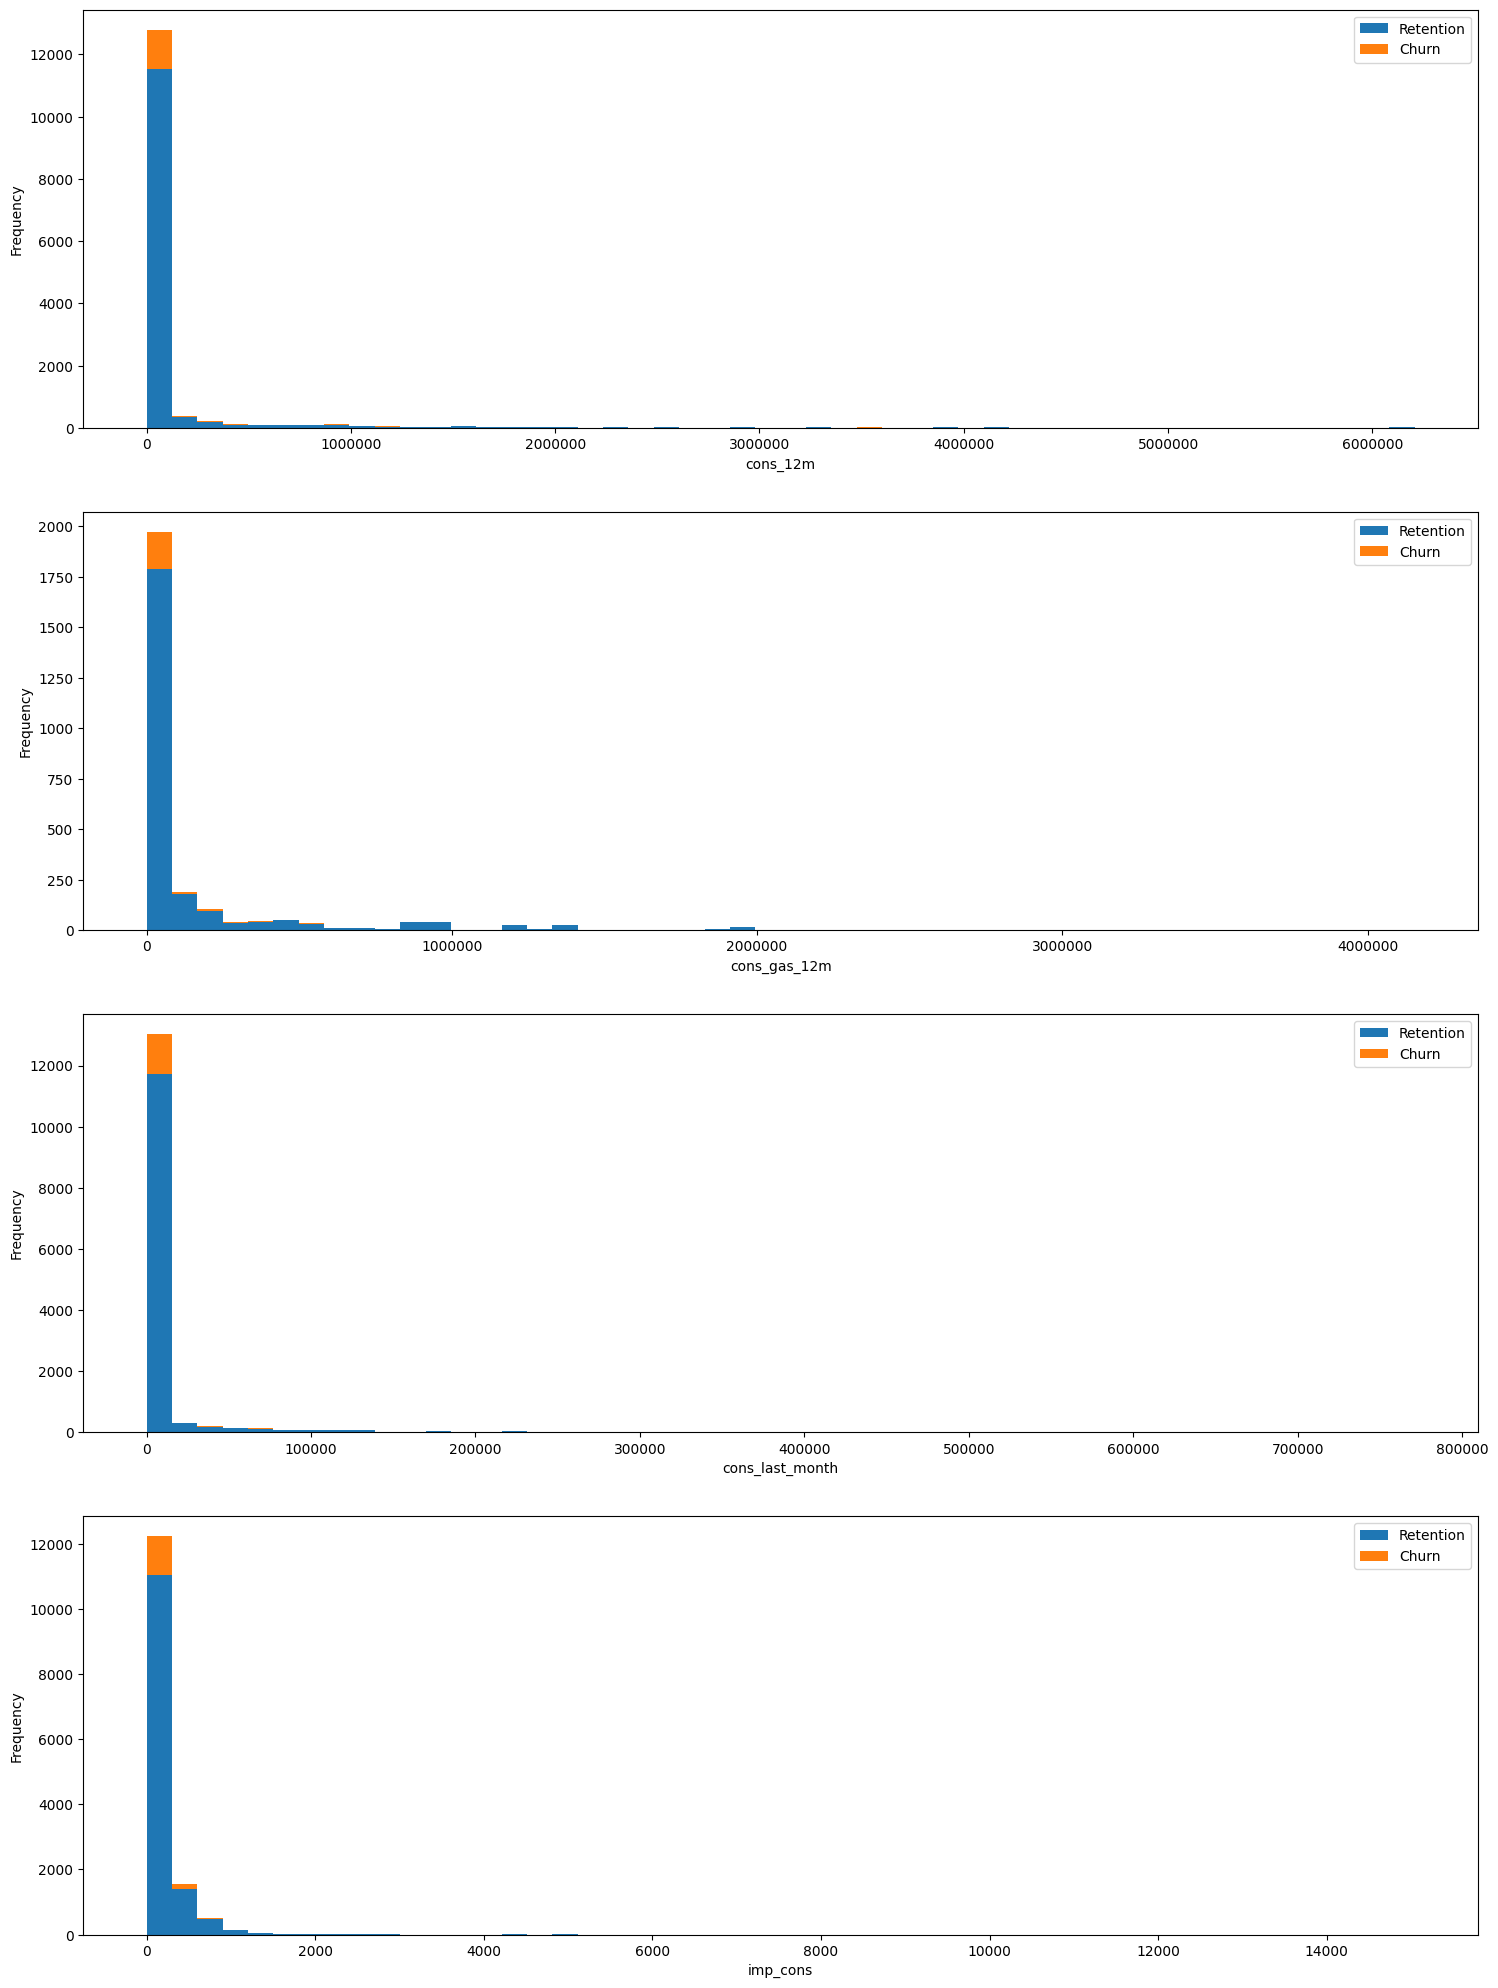

In [51]:
consumption = client_df[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

**Forcast_col**

In [52]:
forecast = client_df[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

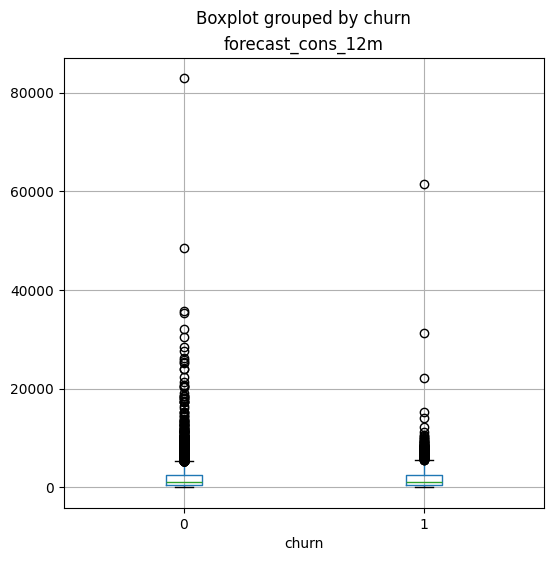

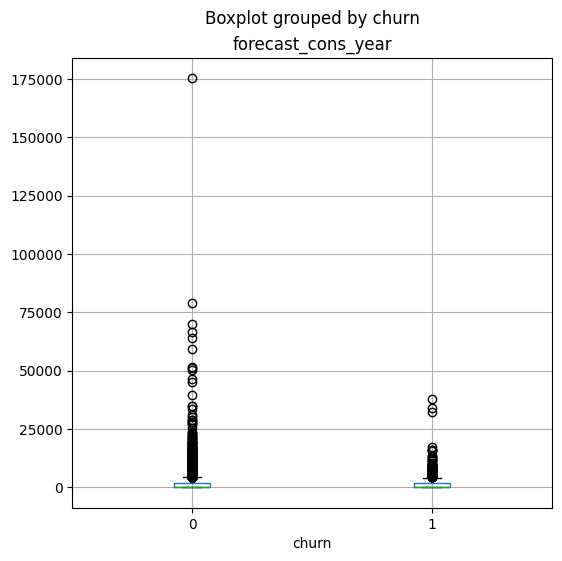

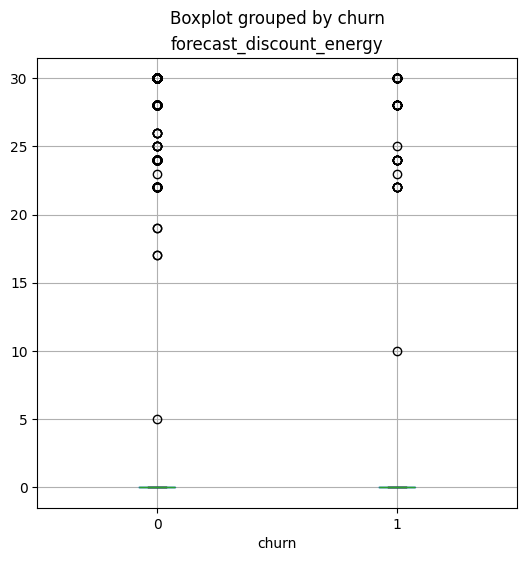

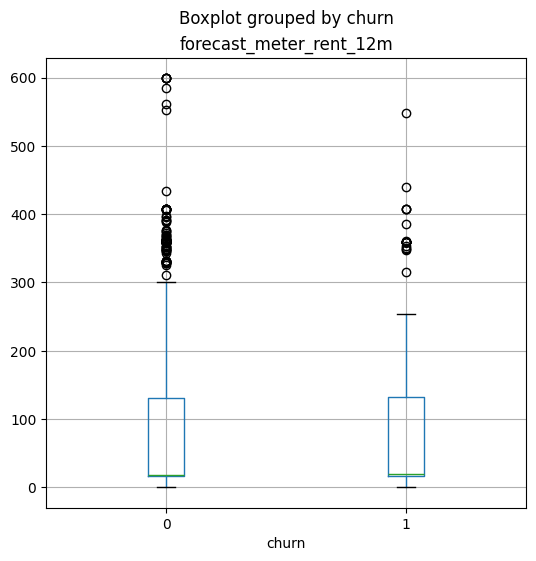

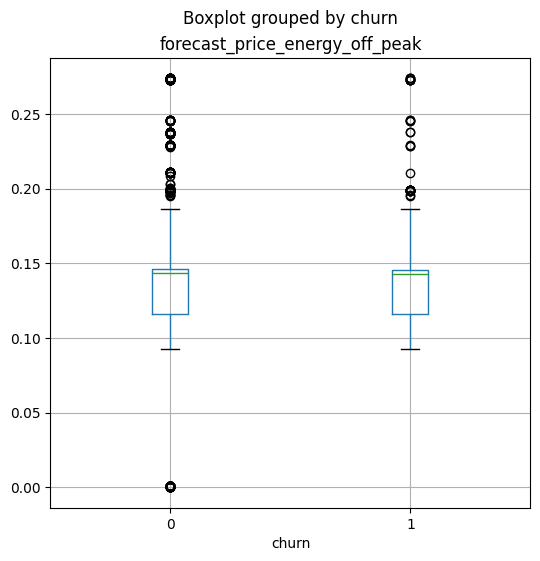

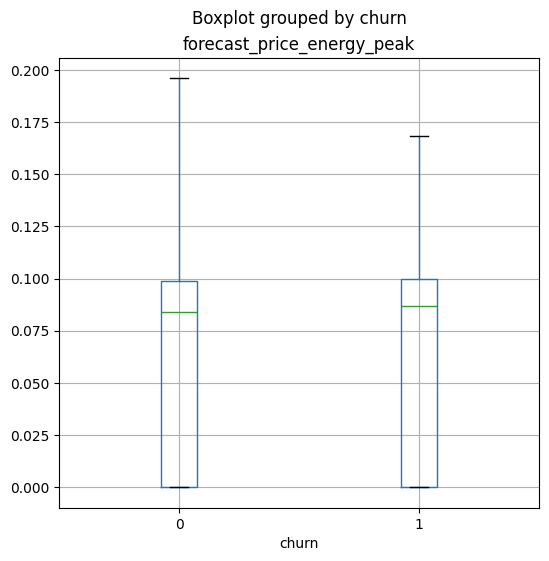

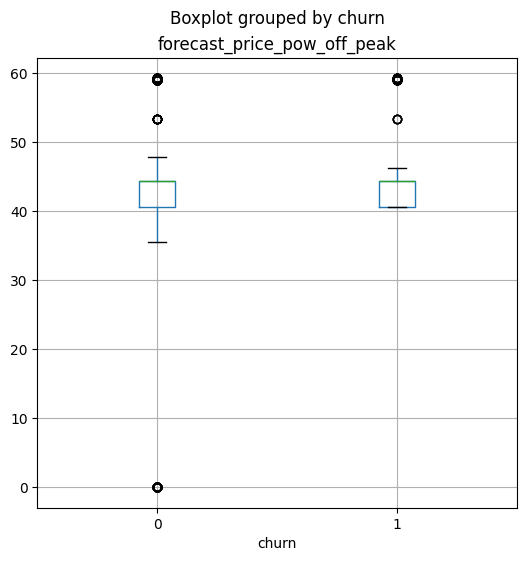

In [53]:
for col in forecast:
    client_df.boxplot(column=col, by='churn', figsize=(6,6))
    plt.title(col)
plt.show()

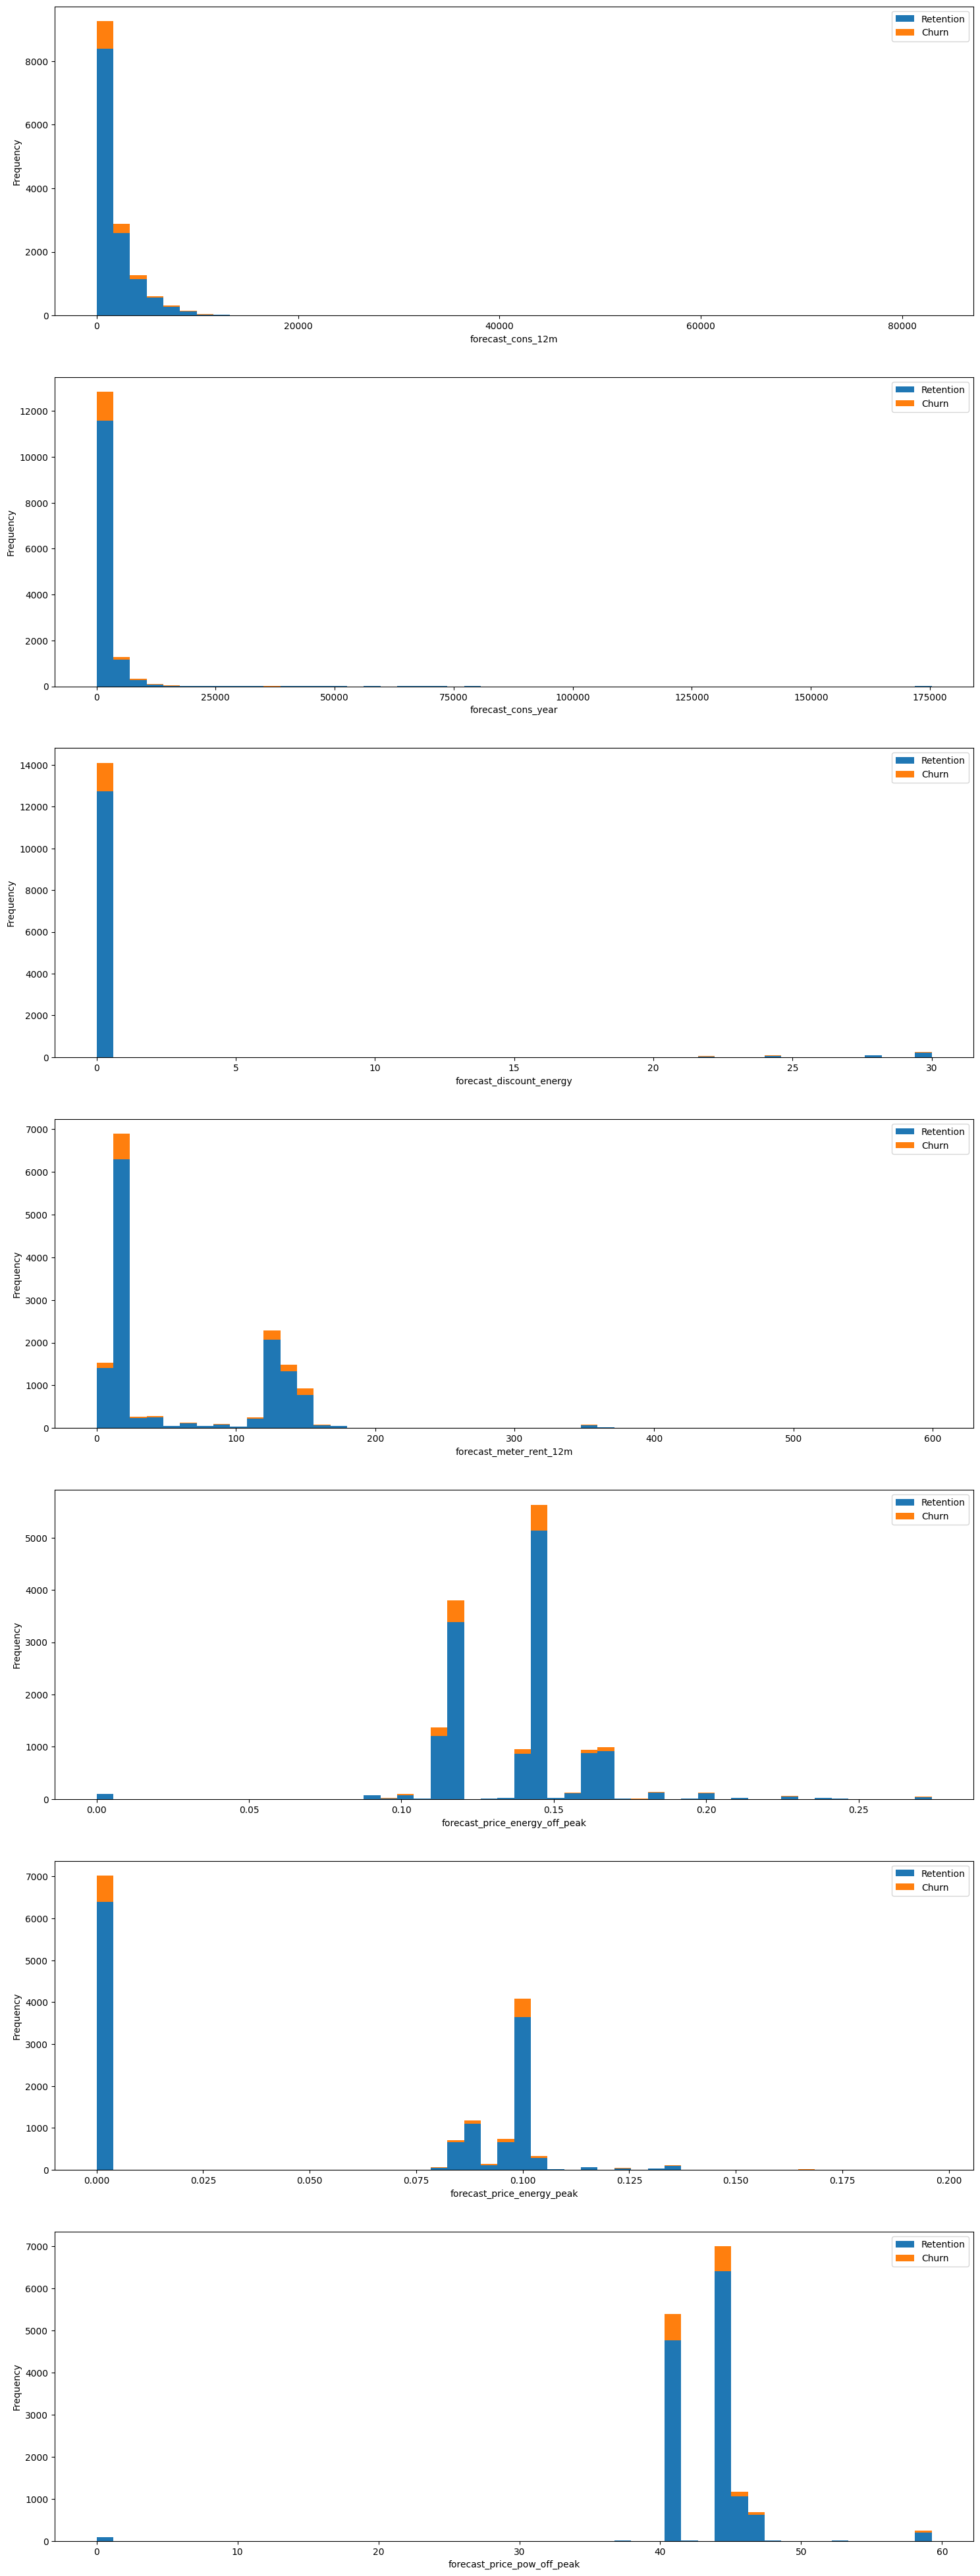

In [54]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

# Price Dataset

In [55]:
price_df["id"].value_counts().value_counts()

count
12    15990
11       83
10       11
9         6
8         3
7         3
Name: count, dtype: int64

In [56]:
price_df["price_date"].value_counts()

price_date
2015-08-01    16094
2015-12-01    16094
2015-07-01    16090
2015-11-01    16087
2015-06-01    16085
2015-10-01    16085
2015-02-01    16082
2015-09-01    16082
2015-05-01    16080
2015-04-01    16079
2015-03-01    16074
2015-01-01    16070
Name: count, dtype: int64

Since the entries of data have large set so better visualsation will be a **histogram**

In [60]:
def plot_histogram_by_churn(df, target_variable, figsize=(20,5), bins=100, if_churn=True):
    fig = plt.figure(figsize=figsize)
    if if_churn:
        ax = sns.histplot(data=df, x=target_variable, bins=bins, hue='churn')
    else:
        ax = sns.histplot(data=df, x=target_variable, bins=bins)

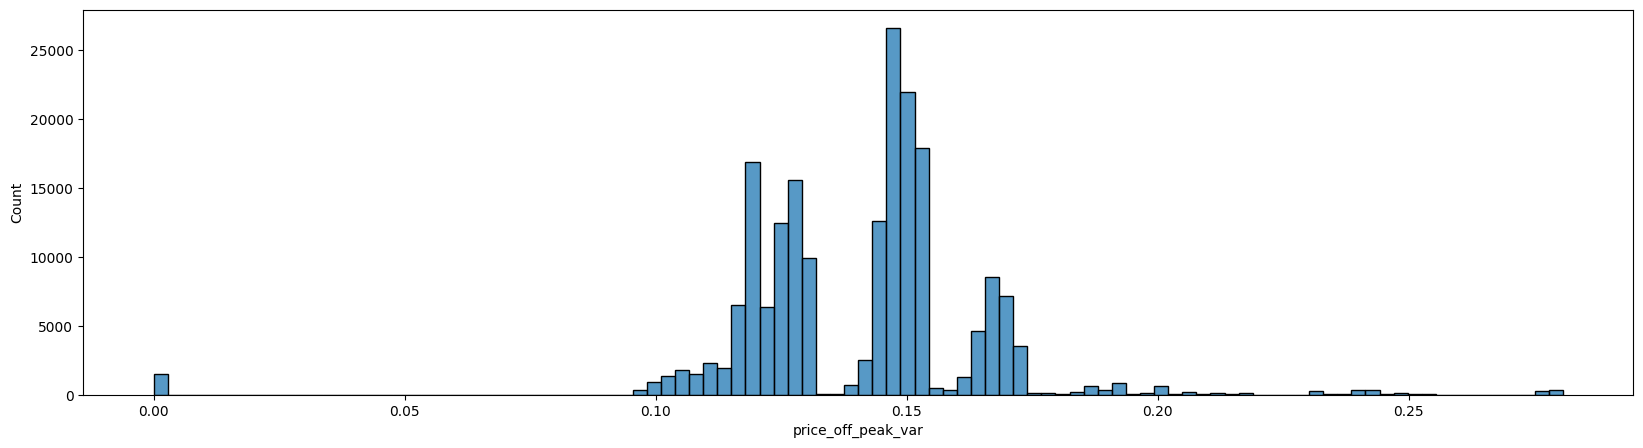

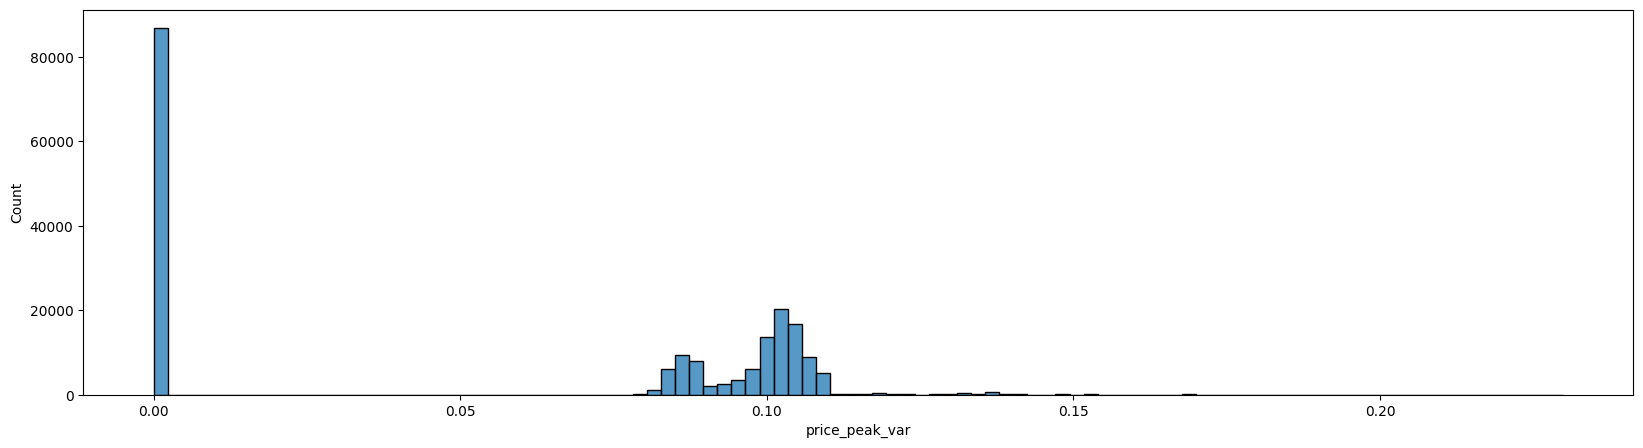

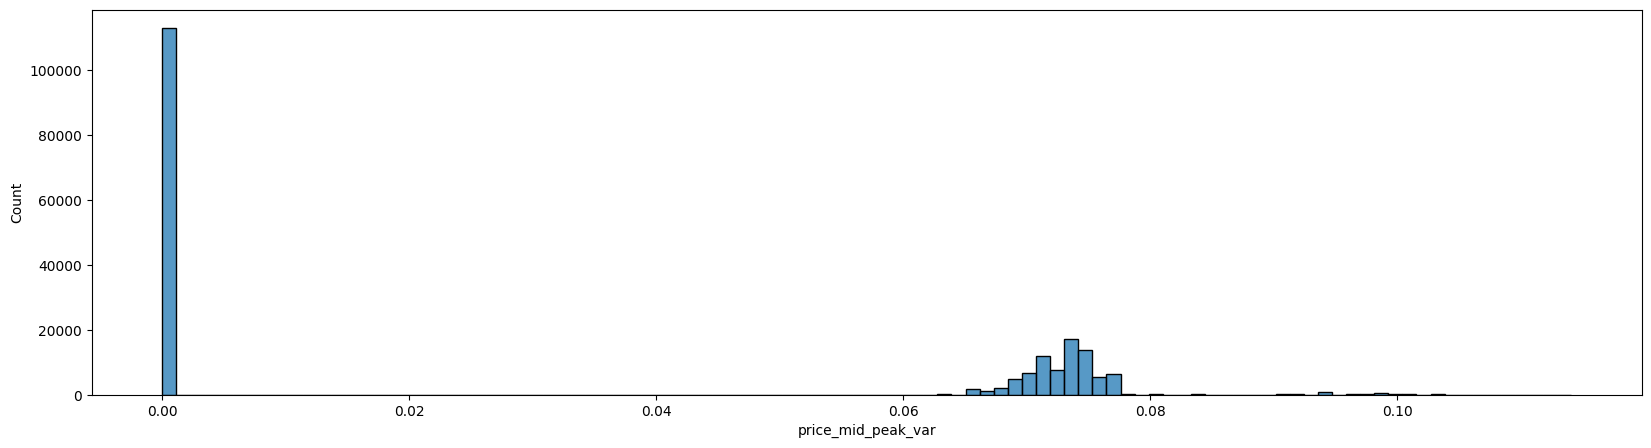

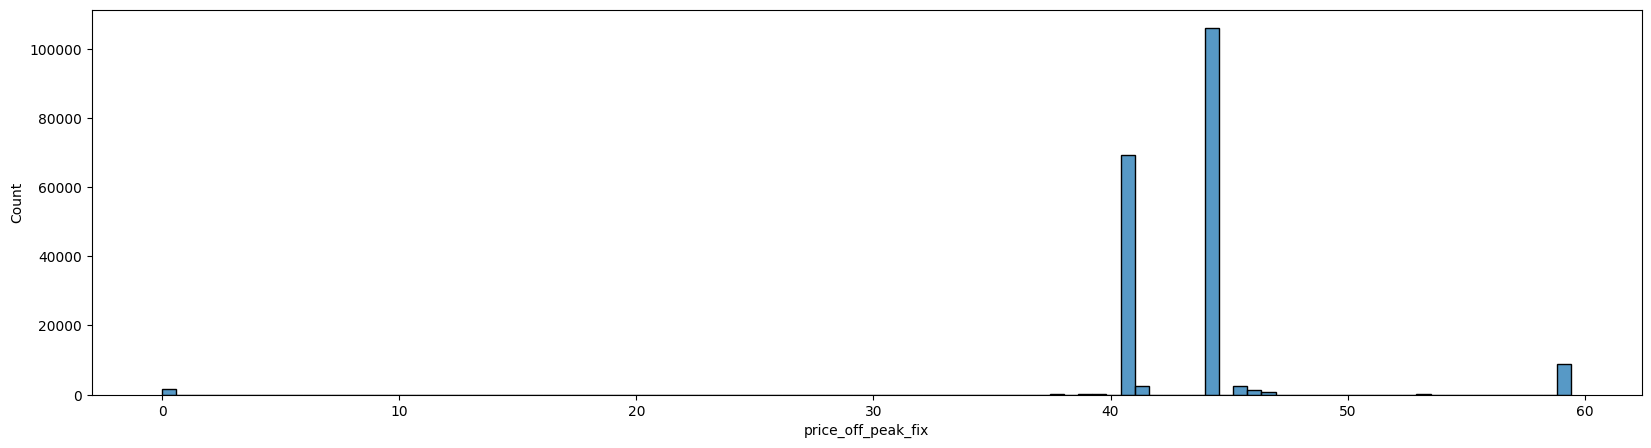

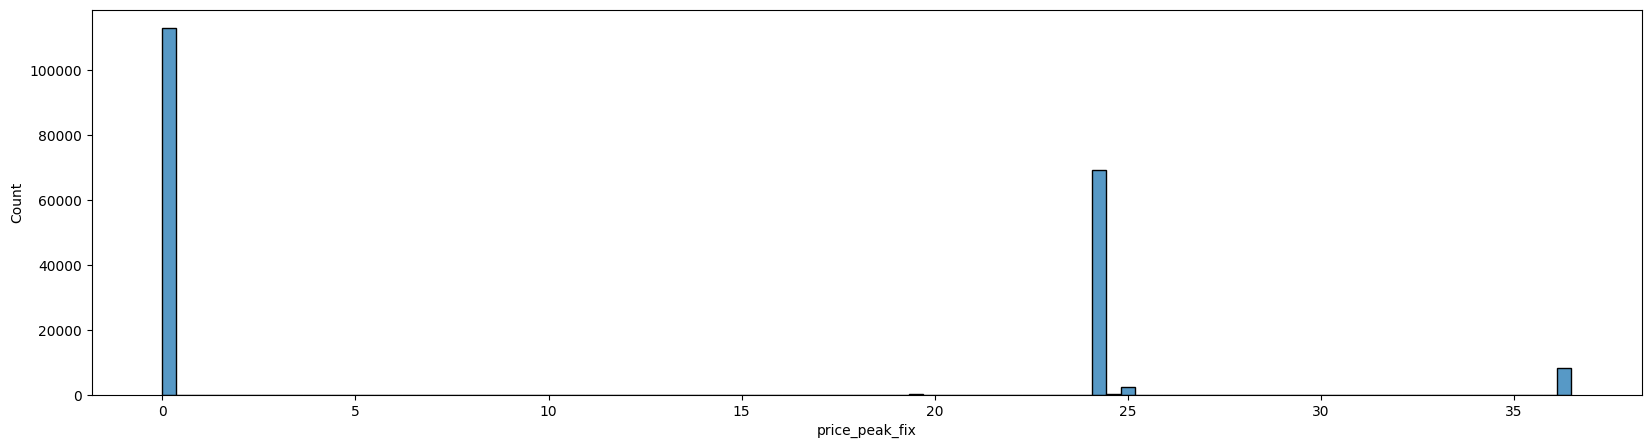

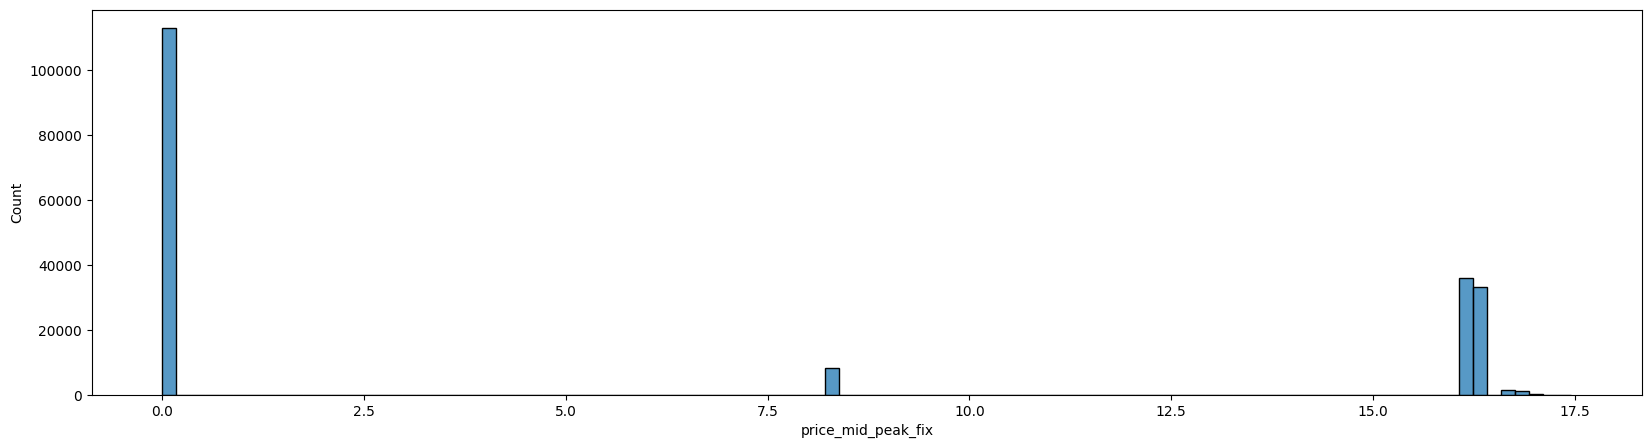

In [61]:
for attr in ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']:
    plot_histogram_by_churn(df=price_df, target_variable=attr, if_churn=False)

Lets analyse price sensivity only based on off-peak prices

# Investigating our Hypothesis

Now, let's investigate customer's action to price. 

When the price increases and some cutomers leave, then we can say these customers are sensitive to price as the increase in prices lead the customer churn. In case there is a decrease or no change in the price and cutomers still switch, it is hard to say these cutomers are sensitive to price.

Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure price sensitivity using the average of the year, the last 6 months and the last 3 months

In [85]:
# Create mean average data
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_6m = price_df[price_df['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_df[price_df['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

In [86]:
mean_year.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000


In [87]:
# rename the columns of mean year
mean_year = mean_year.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)
mean_year["mean_year_price_off_peak"] = mean_year["mean_year_price_off_peak_var"] + mean_year["mean_year_price_off_peak_fix"]
mean_year["mean_year_price_peak"] = mean_year["mean_year_price_peak_var"] + mean_year["mean_year_price_peak_fix"]
mean_year["mean_year_price_med_peak"] = mean_year["mean_year_price_mid_peak_var"] + mean_year["mean_year_price_mid_peak_fix"]

In [88]:
#rename the columns of mean 6 month
mean_6m = mean_6m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)
mean_6m["mean_year_price_off_peak"] = mean_6m["mean_year_price_off_peak_var"] + mean_6m["mean_year_price_off_peak_fix"]
mean_6m["mean_year_price_peak"] = mean_6m["mean_year_price_peak_var"] + mean_6m["mean_year_price_peak_fix"]
mean_6m["mean_year_price_med_peak"] = mean_6m["mean_year_price_mid_peak_var"] + mean_6m["mean_year_price_mid_peak_fix"]

In [89]:
#rename the columns of mean 3 month
mean_3m = mean_3m.rename(

    columns={
        "price_off_peak_var": "mean_year_price_off_peak_var",
        "price_peak_var": "mean_year_price_peak_var",
        "price_mid_peak_var": "mean_year_price_mid_peak_var",
        "price_off_peak_fix": "mean_year_price_off_peak_fix",
        "price_peak_fix": "mean_year_price_peak_fix",
        "price_mid_peak_fix": "mean_year_price_mid_peak_fix"
    }
)

mean_3m["mean_year_price_off_peak"] = mean_3m["mean_year_price_off_peak_var"] + mean_3m["mean_year_price_off_peak_fix"]
mean_3m["mean_year_price_peak"] = mean_3m["mean_year_price_peak_var"] + mean_3m["mean_year_price_peak_fix"]
mean_3m["mean_year_price_med_peak"] = mean_3m["mean_year_price_mid_peak_var"] + mean_3m["mean_year_price_mid_peak_fix"]

In [90]:
# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [91]:
price_features.head()

,id,price_date_x,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,...,price_date,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,2015-11-16,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,2015-11-16,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,2015-11-16,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,2015-06-16 12:00:00,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,...,2015-11-16,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,2015-11-16,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Let's merge the price feature dataset with churn variable to check whether price sensitivity has any correlation with churn.

In [92]:
price_churn = pd.merge(price_features, client_df[['id', 'churn']], on='id')
price_churn.head()

,id,price_date_x,mean_year_price_off_peak_var_x,mean_year_price_peak_var_x,mean_year_price_mid_peak_var_x,mean_year_price_off_peak_fix_x,mean_year_price_peak_fix_x,mean_year_price_mid_peak_fix_x,mean_year_price_off_peak_x,mean_year_price_peak_x,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,0002203ffbb812588b632b9e628cc38d,2015-06-16 12:00:00,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,2015-06-16 12:00:00,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,2015-06-16 12:00:00,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,2015-06-16 12:00:00,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,2015-06-16 12:00:00,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


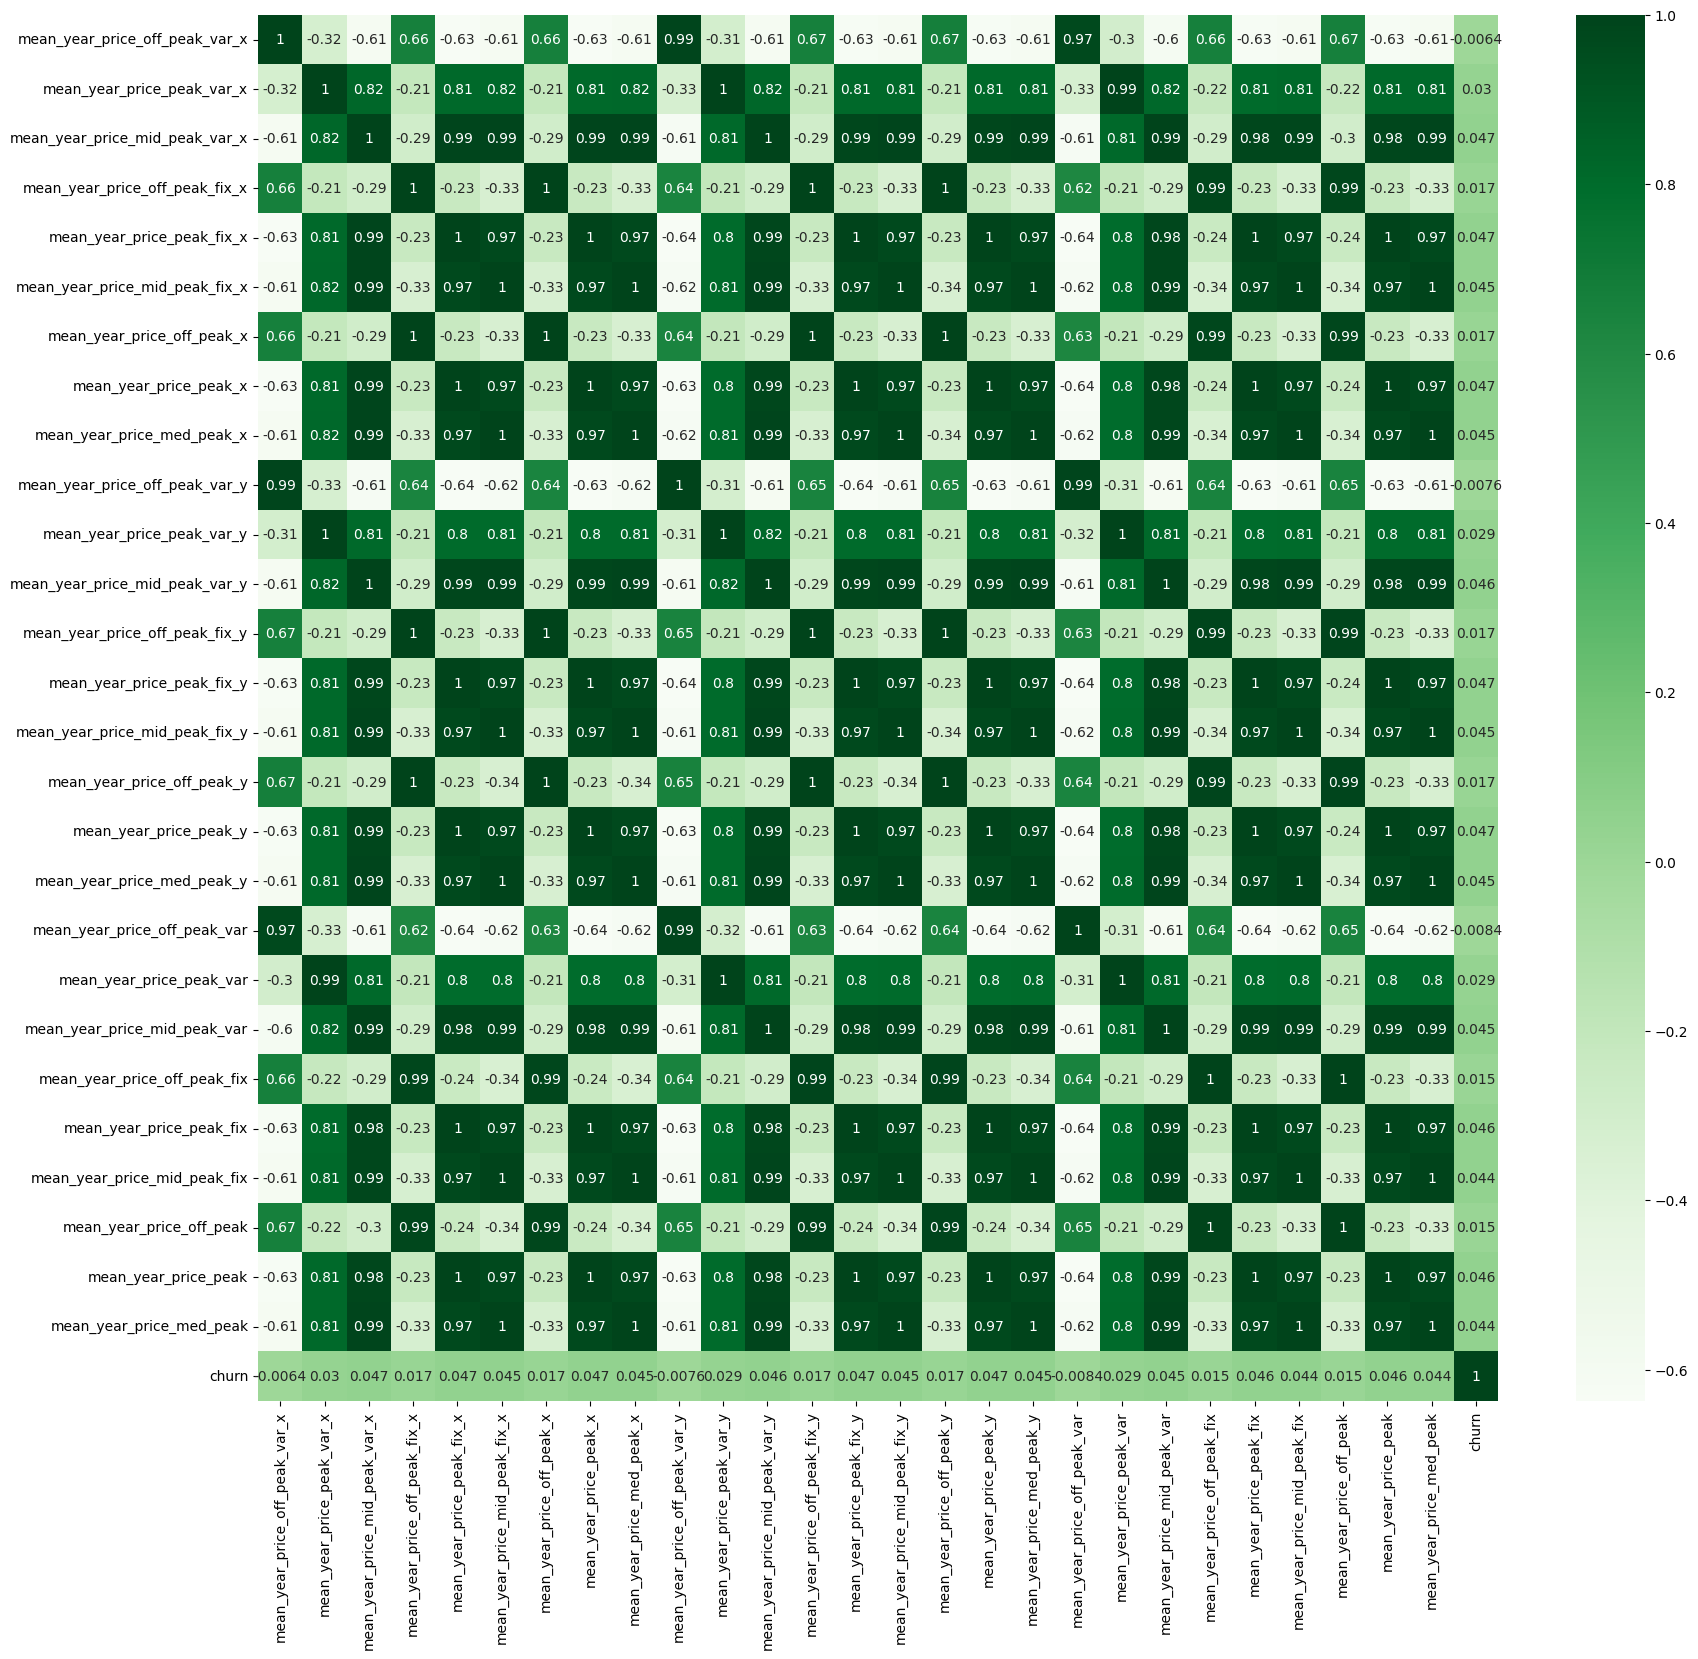

In [98]:
# Drop non-numeric columns
price_churn_numeric = price_churn.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
corr = price_churn_numeric.corr()

# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Greens', annot=True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


The above plot shows the correlation betweeen price variables with each other and with churn, however, the correlation between churn and prices variables is very low, which mean customers' churn is not sensitive to price change.

Now, we will merge the client data with price churn data for modeling in the next move.

In [99]:
churn_data = pd.merge(client_df.drop(columns=['churn']), price_churn, on='id')

In [100]:
churn_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_year_price_off_peak_var,mean_year_price_peak_var,mean_year_price_mid_peak_var,mean_year_price_off_peak_fix,mean_year_price_peak_fix,mean_year_price_mid_peak_fix,mean_year_price_off_peak,mean_year_price_peak,mean_year_price_med_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


In [101]:
churn_data.to_csv('churn_data_modeling.csv')